[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/2.2.%20KRX%20%EC%A0%84%EC%B2%B4%20%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D-input.ipynb)

## 한국거래소(KRX) 전체 종목 분석
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* FinanceDataReader를 통한 KRX 전체 종목 수집
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## ⚠️ 주의할 점 ⚠️ 
* 강좌의 분석내용과 여러분의 실습 결과는 시점의 차이로 빈도수 등의 결과값이 다르게 나옵니다.



## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import seaborn as sns

## FinanceDataReader 로 수집한 전체 종목 불러오기

* 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
* https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

## <font color="red">종목명이 영문으로 표기될 때</font>

해당 수업은 실시간으로 한국거래소에서 FinanceDataReader 라는 라이브러리를 통해 데이터를 받아오고 있습니다.
아래 링크에 있는 라이브러리의 소스코드가 KRX 전체 종목을 가져오는 소스코드입니다.

[FinanceDataReader/listing.py at master · FinanceData/FinanceDataReader](https://github.com/FinanceData/FinanceDataReader/blob/master/krx/listing.py)

이 때, 전체 상장종목과 거래할 수 있는 ETF 등의 종목도 함께 가져오게 되는데,
FinanceDataReader 에서는 코스피, 코스닥, 코넥스 정보가 있는 엑셀파일과 금융상품 정보가 있는 JSON 데이터를 가져와서 병합하는 형태로 데이터를 제공하고 있습니다.
그런데 최근 JSON 데이터의 종목명이 영문으로 변경되어 제공되고 있음을 확인했습니다.
그래서 아래의 엑셀 데이터를 read_html 로 읽어오게 되면 한글로 된 종목명을 받아서 분석해 보실 수 있습니다.

In [84]:
# # 종목명이 영문으로 표기 될 때 아래의 주석을 풀고 데이터를 받아서 분석해 보세요!
# url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
# df_listing = pd.read_html(url, header=0)[0]
# cols_ren = {'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
#                     '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
#                     '홈페이지':'HomePage', '지역':'Region', }
# df = df_listing.rename(columns = cols_ren)
# df['Symbol'] = df['Symbol'].apply(lambda x: '{:06d}'.format(x))
# df['ListingDate'] = pd.to_datetime(df['ListingDate'])
# df

df_listing = pd.read_html(url, header=0, encoding='cp949')[0]
df_listing.head()

import FinanceDataReader as fdr
df_sp500 = fdr.StockListing('S&P500')

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/bs4/__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [85]:
df_sp500.head()

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [6]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2676 non-null   object
 1   종목코드    2676 non-null   int64 
 2   업종      2676 non-null   object
 3   주요제품    2662 non-null   object
 4   상장일     2676 non-null   object
 5   결산월     2676 non-null   object
 6   대표자명    2676 non-null   object
 7   홈페이지    2503 non-null   object
 8   지역      2676 non-null   object
dtypes: int64(1), object(8)
memory usage: 188.3+ KB


In [10]:
df_listing.describe(include='object')


,회사명,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
count,2676,2676,2662,2676,2676,2676,2503,2676
unique,2676,159,2472,1990,10,2553,2480,22
top,BGF리테일,소프트웨어 개발 및 공급업,기업인수합병,1996-07-03,12월,김종현,http://www.ibks.com,서울특별시
freq,1,177,42,8,2615,5,3,1081


In [ ]:
# 이전 강좌에서 to_csv로 저장해둔 krx.csv 파일을 pd.read_csv 로 불러옵니다.
# krx 파일이 없다면 아래 주석을 제거하고 csv 파일을 로드해 보세요!
# df = pd.read_csv("https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv")
# df

### 일부 데이터만 가져오기

{'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
                            '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
                            '홈페이지':'HomePage', '지역':'Region', }

In [11]:
df = df_listing.copy()
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
1,DL건설,1880,건물 건설업,"도로건설공사,토목공사,건축공사,조경공사/부동산 임대,매매",1977-12-22,12월,박유신,http://www.dlconstruction.co.kr,인천광역시
2,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://www.drbworld.com,부산광역시
3,E1,17940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,"구자용, 천정식 (각자 대표이사)",http://www.e1.co.kr,서울특별시
4,HDC,12630,기타 금융업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",1996-10-16,12월,"정몽규, 정경구",http://www.i-park.com,서울특별시


In [12]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
1,DL건설,1880,건물 건설업,"도로건설공사,토목공사,건축공사,조경공사/부동산 임대,매매",1977-12-22,12월,박유신,http://www.dlconstruction.co.kr,인천광역시
2,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://www.drbworld.com,부산광역시
3,E1,17940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,"구자용, 천정식 (각자 대표이사)",http://www.e1.co.kr,서울특별시
4,HDC,12630,기타 금융업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",1996-10-16,12월,"정몽규, 정경구",http://www.i-park.com,서울특별시


In [13]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2671,지에프씨생명과학,388610,기타 화학제품 제조업,화장품 바이오 소재 및 임상실험,2022-12-23,12월,강희철 / 표형배,http://www.gfcos.co.kr/,경기도
2672,큐러블,86460,자연과학 및 공학 연구개발업,유전체 분석 서비스,2013-07-01,12월,김승일,http://www.snp-genetics.com,경기도
2673,틸론,217880,소프트웨어 개발 및 공급업,"가상화 솔루션(D,A,V,E,I,T Solution) 및 ecloud.com",2015-05-28,12월,최용호,http://www.tilon.com,서울특별시
2674,파워풀엑스,266870,기타 화학제품 제조업,플렉스파워 리커버리크림,2017-04-24,12월,박인철,http://www.flexpower.co.kr,서울특별시
2675,한중엔시에스,107640,자동차 신품 부품 제조업,"자동차 신품 부품제조업(배기시스템부품, Electroinc, 전기차 밧데리 모듈 부...",2013-12-10,12월,김환식,http://www.hjncs.com,경상북도


In [39]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다. 
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2320,DB하이텍,990,반도체 제조업,반도체 제조,1975-12-12,12월,조기석,http://www.dbhitek.co.kr,경기도


## 데이터 요약하기

In [40]:
# info 로 요약 데이터를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2676 non-null   object
 1   종목코드    2676 non-null   int64 
 2   업종      2676 non-null   object
 3   주요제품    2662 non-null   object
 4   상장일     2676 non-null   object
 5   결산월     2676 non-null   object
 6   대표자명    2676 non-null   object
 7   홈페이지    2503 non-null   object
 8   지역      2676 non-null   object
dtypes: int64(1), object(8)
memory usage: 188.3+ KB


In [41]:
# describe 로 기술통계값을 봅니다.
df.describe()

,종목코드
count,2676.000000
mean,148722.690583
std,152564.788719
min,20.000000
25%,32055.000000
50%,90390.000000
75%,244565.000000
max,950220.000000


In [42]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

회사명     2676
종목코드    2676
업종       159
주요제품    2472
상장일     1990
결산월       10
대표자명    2553
홈페이지    2480
지역        22
dtype: int64

In [43]:
# index 값 보기
df.index

RangeIndex(start=0, stop=2676, step=1)

In [44]:
# 컬럼값 보기
df.columns

Index(['회사명', '종목코드', '업종', '주요제품', '상장일', '결산월', '대표자명', '홈페이지', '지역'], dtype='object')

In [46]:
# 값만 보기
df.values

array([['BGF리테일', 282330, '종합 소매업', ..., '민승배',
        'http://www.bgfretail.com', '서울특별시'],
       ['DL건설', 1880, '건물 건설업', ..., '박유신',
        'http://www.dlconstruction.co.kr', '인천광역시'],
       ['DRB동일', 4840, '고무제품 제조업', ..., '류영식', 'http://www.drbworld.com',
        '부산광역시'],
       ...,
       ['틸론', 217880, '소프트웨어 개발 및 공급업', ..., '최용호',
        'http://www.tilon.com', '서울특별시'],
       ['파워풀엑스', 266870, '기타 화학제품 제조업', ..., '박인철',
        'http://www.flexpower.co.kr', '서울특별시'],
       ['한중엔시에스', 107640, '자동차 신품 부품 제조업', ..., '김환식',
        'http://www.hjncs.com', '경상북도']], dtype=object)

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [47]:
# Name 컬럼 하나만 가져옵니다.
df.loc[100]

회사명                               현대퓨처넷
종목코드                             126560
업종                               전기 통신업
주요제품                 디지털 사이니지, 기업 메시징 등
상장일                          2010-12-23
결산월                                 12월
대표자명                                김성일
홈페이지    http://www.hyundaifuturenet.com
지역                                서울특별시
Name: 100, dtype: object

In [49]:
df.columns

Index(['회사명', '종목코드', '업종', '주요제품', '상장일', '결산월', '대표자명', '홈페이지', '지역'], dtype='object')

In [50]:
# df["Name"] 의 type을 봅니다.
type(df['회사명'])

pandas.core.series.Series

In [51]:
# 0번째 행만 가져옵니다. 행인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[1001]

회사명                          무림P&P
종목코드                          9580
업종                 펄프, 종이 및 판지 제조업
주요제품    표백화학펄프(B.K.P) 제조,목재가공,조림사업
상장일                     1989-06-20
결산월                            12월
대표자명                           이도균
홈페이지    http://www.moorimpnp.co.kr
지역                           울산광역시
Name: 1001, dtype: object

In [52]:
# df.loc[0] 의 type을 봅니다.
type(df.loc[0])

pandas.core.series.Series

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [53]:
# df 변수의 타입을 봅니다.
type(df)

pandas.core.frame.DataFrame

In [54]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다. 
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요. 
df[['회사명', '종목코드', '업종', '주요제품', '상장일', '결산월', '대표자명', '홈페이지', '지역']]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
1,DL건설,1880,건물 건설업,"도로건설공사,토목공사,건축공사,조경공사/부동산 임대,매매",1977-12-22,12월,박유신,http://www.dlconstruction.co.kr,인천광역시
2,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://www.drbworld.com,부산광역시
3,E1,17940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,"구자용, 천정식 (각자 대표이사)",http://www.e1.co.kr,서울특별시
4,HDC,12630,기타 금융업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",1996-10-16,12월,"정몽규, 정경구",http://www.i-park.com,서울특별시
...,...,...,...,...,...,...,...,...,...
2671,지에프씨생명과학,388610,기타 화학제품 제조업,화장품 바이오 소재 및 임상실험,2022-12-23,12월,강희철 / 표형배,http://www.gfcos.co.kr/,경기도
2672,큐러블,86460,자연과학 및 공학 연구개발업,유전체 분석 서비스,2013-07-01,12월,김승일,http://www.snp-genetics.com,경기도
2673,틸론,217880,소프트웨어 개발 및 공급업,"가상화 솔루션(D,A,V,E,I,T Solution) 및 ecloud.com",2015-05-28,12월,최용호,http://www.tilon.com,서울특별시
2674,파워풀엑스,266870,기타 화학제품 제조업,플렉스파워 리커버리크림,2017-04-24,12월,박인철,http://www.flexpower.co.kr,서울특별시


In [56]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
df.loc[[0, 1, 2, 3]]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
1,DL건설,1880,건물 건설업,"도로건설공사,토목공사,건축공사,조경공사/부동산 임대,매매",1977-12-22,12월,박유신,http://www.dlconstruction.co.kr,인천광역시
2,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://www.drbworld.com,부산광역시
3,E1,17940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,"구자용, 천정식 (각자 대표이사)",http://www.e1.co.kr,서울특별시


In [57]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df[["회사명"]]

,회사명
0,BGF리테일
1,DL건설
2,DRB동일
3,E1
4,HDC
...,...
2671,지에프씨생명과학
2672,큐러블
2673,틸론
2674,파워풀엑스


### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [61]:
# 행과 열 함께 가져오기
# .loc[행, 열]
df.loc[:, '회사명']


0         BGF리테일
1           DL건설
2          DRB동일
3             E1
4            HDC
          ...   
2671    지에프씨생명과학
2672         큐러블
2673          틸론
2674       파워풀엑스
2675      한중엔시에스
Name: 회사명, Length: 2676, dtype: object

In [ ]:
# .loc[행, 열]


In [ ]:
# %timeit


In [ ]:
# %timeit


In [66]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[1,2,3], ['회사명', '종목코드']]

,회사명,종목코드
1,DL건설,1880
2,DRB동일,4840
3,E1,17940


In [67]:
# 여러개의 행과 여러 개의 컬럼 가져오기
# .loc[행, 열]
df.loc[[1,2,3], ['회사명', '종목코드', '업종', '주요제품']]

,회사명,종목코드,업종,주요제품
1,DL건설,1880,건물 건설업,"도로건설공사,토목공사,건축공사,조경공사/부동산 임대,매매"
2,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매"
3,E1,17940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매"


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [78]:
# 카카오를 찾습니다.
df[df['회사명'] == '카카오']

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
1048,카카오,35720,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,홍은택 대표이사,http://www.kakaocorp.com,제주특별자치도


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [ ]:
# and => &
# or => |
True and False

In [137]:
df_sp500.sample(10)

,Symbol,Name,Sector,Industry
127,COO,CooperCompanies,Health Care,Health Care Supplies
114,CLX,Clorox,Consumer Staples,Household Products
496,XEL,Xcel Energy,Utilities,Multi-Utilities
132,COST,Costco,Consumer Staples,Consumer Staples Merchandise Retail
259,IVZ,Invesco,Financials,Asset Management & Custody Banks
272,KVUE,Kenvue,Consumer Staples,Personal Care Products
290,LYV,Live Nation Entertainment,Communication Services,Movies & Entertainment
227,PEAK,Healthpeak,Real Estate,Health Care REITs
71,BWA,BorgWarner,Consumer Discretionary,Automotive Parts & Equipment
350,NXPI,NXP Semiconductors,Information Technology,Semiconductors


In [149]:
df_sp500[df_sp500['Name'].str.contains('apple', case=False)]

,Symbol,Name,Sector,Industry
39,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"


In [147]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
# df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Symbol", "Name"]]

df_sp500[(df_sp500['Sector'].str.contains('information', case = False)) & (df_sp500['Industry'].str.contains('Technology', case = False))]

,Symbol,Name,Sector,Industry
39,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"
94,CDW,CDW,Information Technology,Technology Distributors
231,HPE,Hewlett Packard Enterprise,Information Technology,"Technology Hardware, Storage & Peripherals"
239,HPQ,HP Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"
333,NTAP,NetApp,Information Technology,"Technology Hardware, Storage & Peripherals"
412,STX,Seagate Technology,Information Technology,"Technology Hardware, Storage & Peripherals"
488,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals"


In [153]:
df_sp500[(df_sp500['Sector'].str.contains('information', case = False)) | (df_sp500['Industry'].str.contains('Technology', case = False))]

,Symbol,Name,Sector,Industry
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
5,ADBE,Adobe Inc.,Information Technology,Application Software
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors
12,AKAM,Akamai,Information Technology,Internet Services & Infrastructure
...,...,...,...,...
452,TYL,Tyler Technologies,Information Technology,Application Software
467,VRSN,Verisign,Information Technology,Internet Services & Infrastructure
470,VRTX,Vertex Pharmaceuticals,Health Care,Biotechnology
488,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals"


In [170]:
df_sp500.loc[(df_sp500['Sector'].str.contains('information', case = False)) | (df_sp500['Industry'].str.contains('Technology', case = False)), ['Symbol', 'Name']]



,Symbol,Name
3,ABBV,AbbVie
4,ACN,Accenture
5,ADBE,Adobe Inc.
6,AMD,Advanced Micro Devices
12,AKAM,Akamai
...,...,...
452,TYL,Tyler Technologies
467,VRSN,Verisign
470,VRTX,Vertex Pharmaceuticals
488,WDC,Western Digital


In [173]:
information = df_sp500['Sector'].str.contains('information', case = False)
application = df_sp500['Sector'].str.contains('application', case = False)
df_sp500[information | application]

,Symbol,Name,Sector,Industry
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
5,ADBE,Adobe Inc.,Information Technology,Application Software
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors
12,AKAM,Akamai,Information Technology,Internet Services & Infrastructure
34,APH,Amphenol,Information Technology,Electronic Components
...,...,...,...,...
450,TRMB,Trimble Inc.,Information Technology,Electronic Equipment & Instruments
452,TYL,Tyler Technologies,Information Technology,Application Software
467,VRSN,Verisign,Information Technology,Internet Services & Infrastructure
488,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals"


국제 원유 가격
국제 원유 가격을 대표하는 3대 유종이 있으며, 생산지와 대표적인 소비지역이 다르다.

서부 텍사스 중질유 (POILWTIUSDM): 국제 원유가격을 대표
두바이유 (POILDUBUSDM): 한국이 주로 수입(국내 유가에 영향)
북해 브렌트유 (POILBREUSDM): 북해에서 생산, 유럽과 아프리카에서 소비
FRED 링크는 각각 다음과 같다.

- 서부 텍사스 중질유(WTI Crude): https://fred.stlouisfed.org/series/POILWTIUSDM
- 두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
- 북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

In [ ]:
# %pip install pandas_datareader

In [179]:
import pandas as pd
import pandas_datareader as pdr

df_oil = pdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM', 'POILBREUSDM'], 'fred', start = '1988-01-01')

In [180]:
df_oil

,POILDUBUSDM,POILWTIUSDM,POILBREUSDM
DATE,,,
1990-01-01,17.501739,22.604348,20.989130
1990-02-01,16.681500,22.202500,19.702500
1990-03-01,15.755909,20.440455,18.465909
1990-04-01,14.250476,18.526667,16.926190
1990-05-01,14.647826,18.443043,16.671739
...,...,...,...
2023-08-01,86.123043,81.372609,85.168261
2023-09-01,93.238571,89.240952,92.673333
2023-10-01,88.787727,85.469091,88.947727


In [182]:
df_oil = df_oil.reset_index()
df_oil

,DATE,POILDUBUSDM,POILWTIUSDM,POILBREUSDM
0,1990-01-01,17.501739,22.604348,20.989130
1,1990-02-01,16.681500,22.202500,19.702500
2,1990-03-01,15.755909,20.440455,18.465909
3,1990-04-01,14.250476,18.526667,16.926190
4,1990-05-01,14.647826,18.443043,16.671739
...,...,...,...,...
403,2023-08-01,86.123043,81.372609,85.168261
404,2023-09-01,93.238571,89.240952,92.673333
405,2023-10-01,88.787727,85.469091,88.947727
406,2023-11-01,82.640909,77.575455,82.186364


In [183]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         408 non-null    datetime64[ns]
 1   POILDUBUSDM  408 non-null    float64       
 2   POILWTIUSDM  408 non-null    float64       
 3   POILBREUSDM  408 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 12.9 KB


In [184]:
df_oil['DATE'].dt.year

0      1990
1      1990
2      1990
3      1990
4      1990
       ... 
403    2023
404    2023
405    2023
406    2023
407    2023
Name: DATE, Length: 408, dtype: int32

## 파생변수 만들기

In [175]:
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,74100,2,-900,-1.20,75000,75200,73600,20810708,1545421527910,442360886955000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,142800,1,4800,3.48,139000,143000,137900,5780714,816463321850,103958737722000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,394000,1,8000,2.07,397500,397500,386500,314399,122964472500,92196000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,815000,2,-11000,-1.33,831000,833000,802000,99897,81513172503,58006810000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,250000,1,5000,2.04,243000,250500,241500,3017429,747064687000,52882876500000,211531506,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,288490,KR7288490006,나라소프트,KONEX,일반기업부,49,3,0,0.00,50,50,46,37336,1766665,2568321868,52414732,KNX
2789,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1486,2,-3,-0.20,0,0,0,0,0,2347820560,1579960,KNX
2790,308700,KR7308700004,테크엔,KONEX,일반기업부,340,5,-60,-15.00,340,448,340,4644,1610044,1360000000,4000000,KNX
2791,322190,KR7322190000,베른,KONEX,일반기업부,114,1,7,6.54,123,123,94,16,1806,1017472458,8925197,KNX


In [189]:
df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
1,DL건설,1880,건물 건설업,"도로건설공사,토목공사,건축공사,조경공사/부동산 임대,매매",1977-12-22,12월,박유신,http://www.dlconstruction.co.kr,인천광역시
2,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://www.drbworld.com,부산광역시
3,E1,17940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,"구자용, 천정식 (각자 대표이사)",http://www.e1.co.kr,서울특별시
4,HDC,12630,기타 금융업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",1996-10-16,12월,"정몽규, 정경구",http://www.i-park.com,서울특별시
...,...,...,...,...,...,...,...,...,...
2671,지에프씨생명과학,388610,기타 화학제품 제조업,화장품 바이오 소재 및 임상실험,2022-12-23,12월,강희철 / 표형배,http://www.gfcos.co.kr/,경기도
2672,큐러블,86460,자연과학 및 공학 연구개발업,유전체 분석 서비스,2013-07-01,12월,김승일,http://www.snp-genetics.com,경기도
2673,틸론,217880,소프트웨어 개발 및 공급업,"가상화 솔루션(D,A,V,E,I,T Solution) 및 ecloud.com",2015-05-28,12월,최용호,http://www.tilon.com,서울특별시
2674,파워풀엑스,266870,기타 화학제품 제조업,플렉스파워 리커버리크림,2017-04-24,12월,박인철,http://www.flexpower.co.kr,서울특별시


In [192]:
df[df['회사명'].str.contains('삼성')]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
43,삼성중공업,10140,선박 및 보트 건조업,"선박(벌크선,원유운반선),철구조물,에너지플랜트 생산,판매/토목건축업",1994-01-28,12월,"최성안, 정진택",http://www.samsungshi.com,경기도
44,삼성출판사,68290,"서적, 잡지 및 기타 인쇄물 출판업","서적 출판,인쇄,소매/부동산 임대",2002-08-05,12월,김진용,http://www.samsungbooks.com,서울특별시
45,삼성카드,29780,기타 금융업,"신용카드업,상품신용판매,현금서비스,카드론,리스,기업대출,여행업무,통신판매",2007-06-27,12월,김대환,http://www.samsungcard.co.kr,서울특별시
163,삼성스팩9호,468510,금융 지원 서비스업,기업인수합병,2023-12-04,12월,오정헌,NaN,서울특별시
371,삼성생명,32830,보험업,"생명보험,부동산 임대",2010-05-12,12월,전영묵,http://www.samsunglife.com,서울특별시
372,삼성전자,5930,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,"한종희, 경계현",http://www.samsung.com/sec,경기도
482,삼성스팩8호,448740,금융 지원 서비스업,기업인수합병,2023-03-02,12월,안신영,NaN,서울특별시
671,삼성FN리츠,448730,부동산 임대 및 공급업,대치타워 및 에스원빌딩,2023-04-10,01월,윤양수,http://www.samsungfnreit.com/,서울특별시
806,삼성스팩6호,425290,금융 지원 서비스업,기업인수합병,2022-06-30,12월,이주혁,NaN,서울특별시
1010,삼성공조,6660,자동차 신품 부품 제조업,"자동차부품(라디에터,오일쿨러) 제조,판매",1987-11-28,12월,고호곤,http://www.samsungcc.co.kr,경상남도


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2676 non-null   object
 1   종목코드    2676 non-null   int64 
 2   업종      2676 non-null   object
 3   주요제품    2662 non-null   object
 4   상장일     2676 non-null   object
 5   결산월     2676 non-null   object
 6   대표자명    2676 non-null   object
 7   홈페이지    2503 non-null   object
 8   지역      2676 non-null   object
dtypes: int64(1), object(8)
memory usage: 188.3+ KB


In [196]:
# pd.to_datetime 을 통해 데이터의 타입을 변환합니다.
df['상장일'] = pd.to_datetime(df['상장일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   회사명     2676 non-null   object        
 1   종목코드    2676 non-null   int64         
 2   업종      2676 non-null   object        
 3   주요제품    2662 non-null   object        
 4   상장일     2676 non-null   datetime64[ns]
 5   결산월     2676 non-null   object        
 6   대표자명    2676 non-null   object        
 7   홈페이지    2503 non-null   object        
 8   지역      2676 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 188.3+ KB


In [198]:
# ListingYear 파생변수 만들기
df['ListingYear'] = df['상장일'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   회사명          2676 non-null   object        
 1   종목코드         2676 non-null   int64         
 2   업종           2676 non-null   object        
 3   주요제품         2662 non-null   object        
 4   상장일          2676 non-null   datetime64[ns]
 5   결산월          2676 non-null   object        
 6   대표자명         2676 non-null   object        
 7   홈페이지         2503 non-null   object        
 8   지역           2676 non-null   object        
 9   ListingYear  2676 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 198.7+ KB


In [199]:
# nan은 not a number의 약자로 결측치를 의미합니다.
df.isnull().sum()

회사명              0
종목코드             0
업종               0
주요제품            14
상장일              0
결산월              0
대표자명             0
홈페이지           173
지역               0
ListingYear      0
dtype: int64

In [200]:
df.isna().sum()

회사명              0
종목코드             0
업종               0
주요제품            14
상장일              0
결산월              0
대표자명             0
홈페이지           173
지역               0
ListingYear      0
dtype: int64

In [205]:
df[['ListingYear', '상장일']].dtypes

ListingYear             int32
상장일            datetime64[ns]
dtype: object

## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

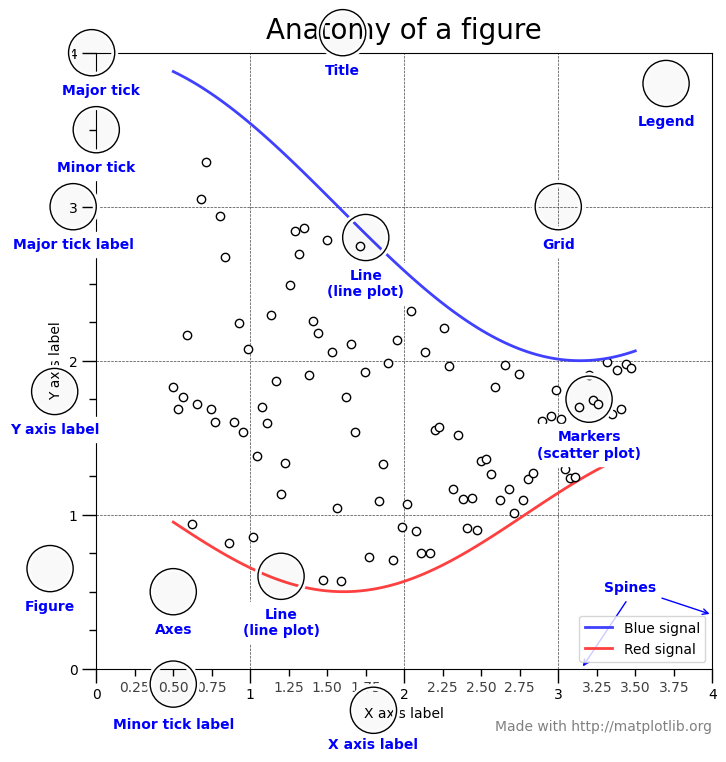

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()


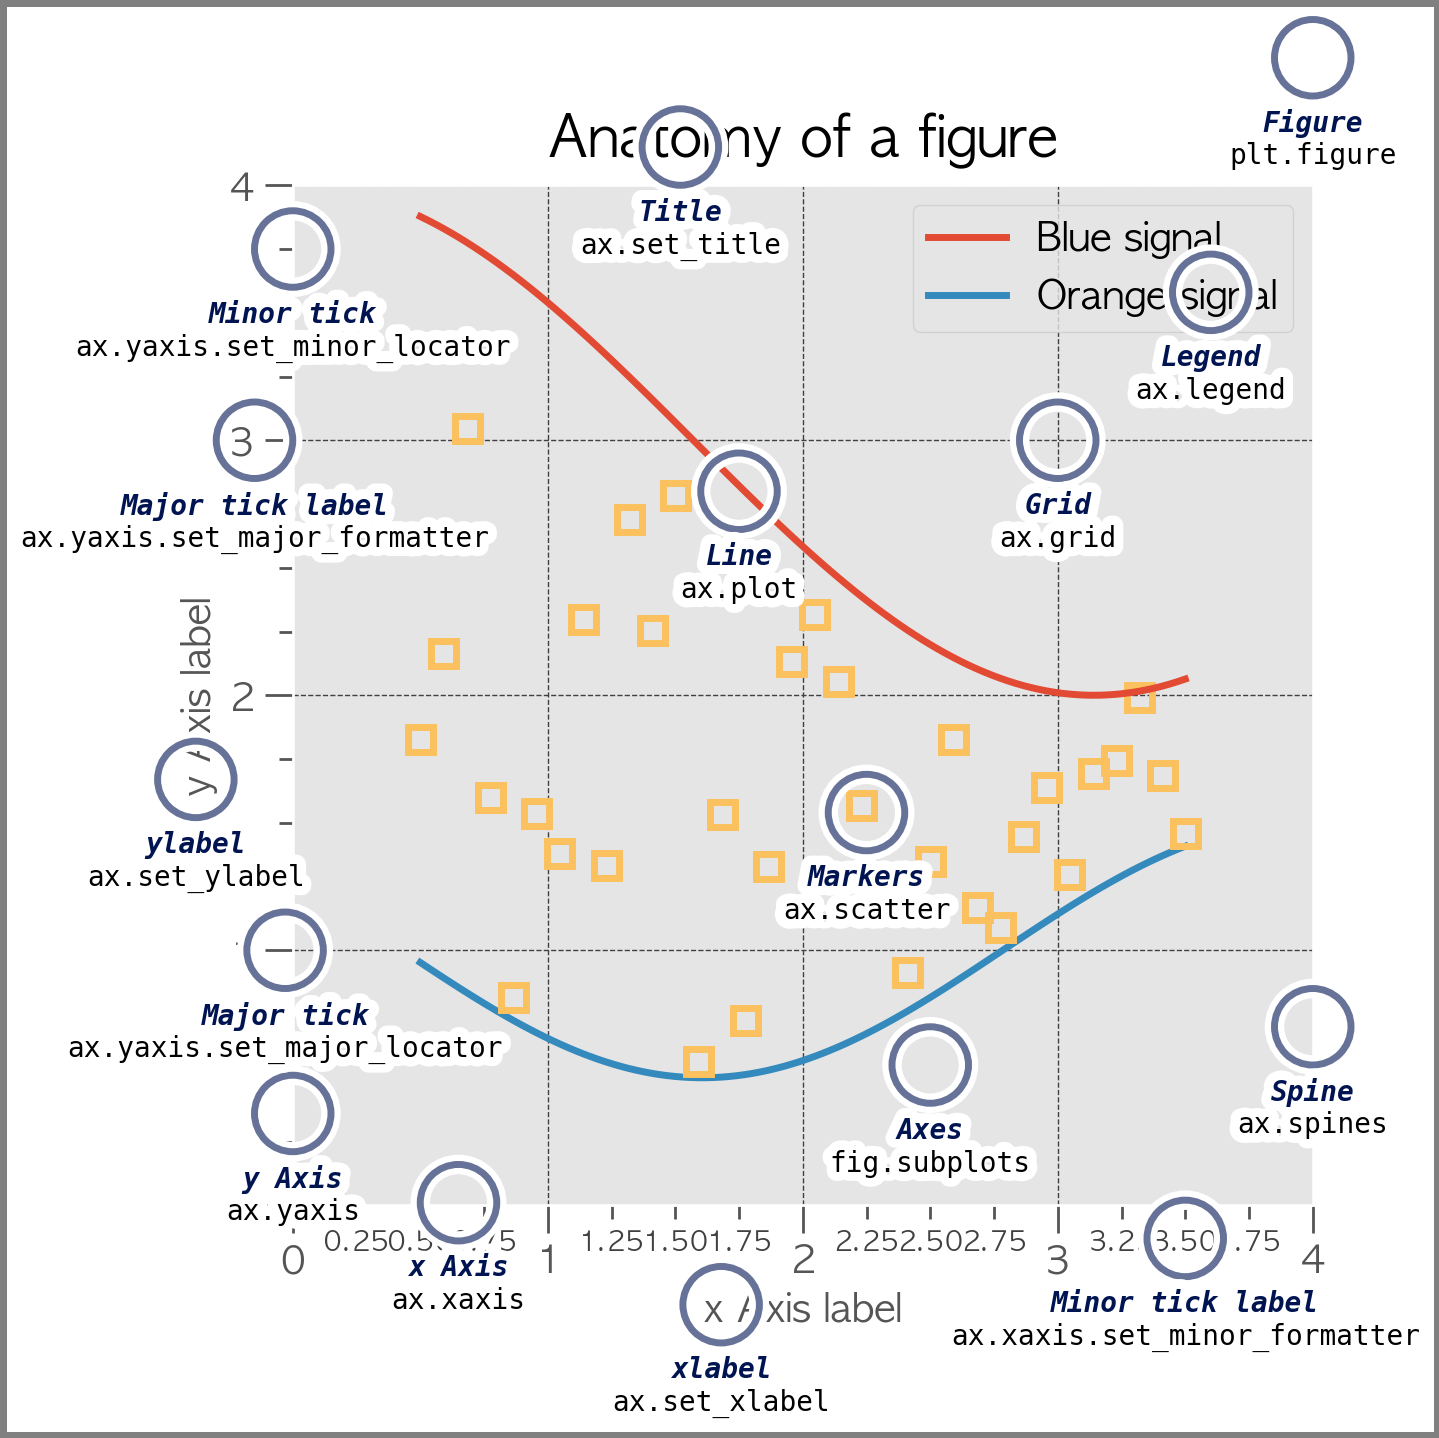

In [253]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

## 데이터 시각화를 위한 폰트설정

In [249]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [250]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'AppleGothic'

In [251]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt
get_font_family = get_font_family()

# 폰트설정
plt.rc("font", family=get_font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

### 폰트 설정 확인하기

<Axes: title={'center': '한글폰트'}>

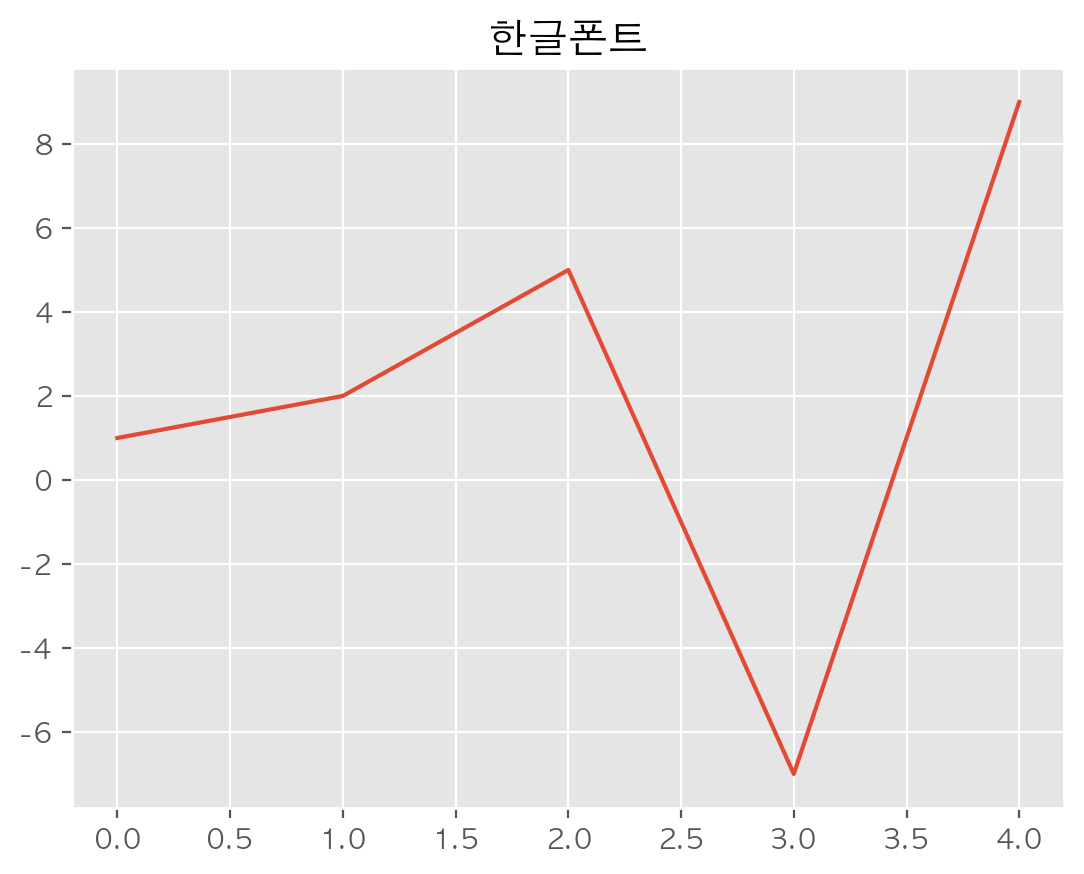

In [252]:
# 한글폰트 확인하기
pd.Series([1, 2, 5, -7, 9]).plot(title="한글폰트")   

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [162]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.


In [163]:
# value_counts()로 빈도수를 구합니다.


In [164]:
# 빈도수를 시각화 합니다.


In [165]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.


### Sector

In [166]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
# sector_count_top


In [167]:
# df_sector_30

In [168]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.


In [169]:
print(plt.colormaps())

NameError: name 'plt' is not defined

In [ ]:
# 빈도수가 가장 많은 데이터 색인하기


### Industry

In [ ]:
# Industry 의 빈도수를 구합니다.
# industry_top30

In [ ]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.


In [ ]:
# df[df["Industry"].isin(industry_top30.index)]

In [ ]:
# seaborn


### Region 

In [ ]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.


In [ ]:
# df["Region"]


In [ ]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.


In [ ]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.


In [ ]:
# Region 을 기준으로 정렬합니다.


## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기


In [ ]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기


### 연도별 상장 종목 빈도수 분석

In [ ]:
# Market, ListingYear 빈도수 구하기
# market_year

### seaborn을 통한 빈도수 시각화

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.


### Pandas를 통한 시각화

In [ ]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.


In [ ]:
# 컬럼값을 subplots 으로 그립니다.


In [ ]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그립니다.


In [ ]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
# market_year.columns


In [ ]:
# 막대(bar)그래프 그리기
# market_year


### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas 1.2.0 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [ ]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
# market_year

In [ ]:
# pivot_table로 같은 결과가 나오게 연산하기


In [ ]:
# 위의 groupby 결과를 scatterplot으로 그립니다.
# df_market_year


In [ ]:
# lineplot 그리기


In [ ]:
# relplot으로 subplot 그리기 - scatter


In [ ]:
# relplot으로 subplot 그리기 - line


### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [ ]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라집니다.


## 데이터 색인

In [ ]:
# 케이맨 제도에 있는 회사 찾기


In [ ]:
# 1970년 이전에 상장한 기업을 찾습니다.


In [ ]:
# and => &
# or  => |
True and True

In [ ]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.


### 지역별 섹터

In [ ]:
# Sector, Region 으로 crosstab 연산을 합니다.
# df_sr


### 컬럼과 인덱스 값으로 색인하기

In [ ]:
# 특정 컬럼만 가져오기


### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [ ]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기


In [ ]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기


In [ ]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기



In [ ]:
# loc로 여러 행과 열 가져오기


In [ ]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.


In [ ]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.



In [ ]:
# iloc[행]
# iloc[행,열]


In [ ]:
# df.head 혹은 tail도 내부에서 iloc를 슬라이싱으로 사용하고 있습니다.
# df.head??

In [ ]:
# df_sr.tail??